In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score,StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)
warnings.filterwarnings(action='ignore', category= FutureWarning)

In [2]:
df=pd.read_csv('train.csv' ,sep=',',skiprows=0,nrows=100000)
df.head

<bound method NDFrame.head of           id      Name  Gender   Age           City  \
0          0  Aaradhya  Female  49.0       Ludhiana   
1          1     Vivan    Male  26.0       Varanasi   
2          2    Yuvraj    Male  33.0  Visakhapatnam   
3          3    Yuvraj    Male  22.0         Mumbai   
4          4      Rhea  Female  30.0         Kanpur   
...      ...       ...     ...   ...            ...   
99995  99995   Anirudh    Male  50.0         Meerut   
99996  99996     Ayush    Male  19.0    Vasai-Virar   
99997  99997   Hrithik    Male  51.0         Nagpur   
99998  99998    Aahana  Female  51.0         Meerut   
99999  99999     Vidya  Female  50.0      Bangalore   

      Working Professional or Student        Profession  Academic Pressure  \
0                Working Professional              Chef                NaN   
1                Working Professional           Teacher                NaN   
2                             Student               NaN                5.0 

In [3]:
print(df.isnull().sum())
print(df.columns.tolist())

id                                           0
Name                                         0
Gender                                       0
Age                                          0
City                                         0
Working Professional or Student              0
Profession                               25952
Academic Pressure                        80271
Work Pressure                            19742
CGPA                                     80271
Study Satisfaction                       80272
Job Satisfaction                         19739
Sleep Duration                               0
Dietary Habits                               4
Degree                                       0
Have you ever had suicidal thoughts ?        0
Work/Study Hours                             0
Financial Stress                             4
Family History of Mental Illness             0
Depression                                   0
dtype: int64
['id', 'Name', 'Gender', 'Age', 'City', 'Workin

In [4]:

df['Profession'] = df['Profession'].fillna(
    df['Working Professional or Student'].apply(
        lambda x: 'Student' if x == 'Student' else 'Unspecified'
    )
)
df['Overall Satisfaction'] = df[['Study Satisfaction', 'Job Satisfaction']].mean(axis=1, skipna=True)
df['Overall Pressure'] = df[['Academic Pressure', 'Work Pressure']].mean(axis=1, skipna=True)

columns_drop=['id', 'Name', 'City', 'Working Professional or Student', 
                   'Study Satisfaction', 'Job Satisfaction', 
                   'Academic Pressure', 'Work Pressure']
df["CGPA"] = df["CGPA"].fillna(value=df["CGPA"].mean())
df.drop(columns_drop, axis=1, inplace=True)
print(df.isnull().sum())



Gender                                    0
Age                                       0
Profession                                0
CGPA                                      0
Sleep Duration                            0
Dietary Habits                            4
Degree                                    0
Have you ever had suicidal thoughts ?     0
Work/Study Hours                          0
Financial Stress                          4
Family History of Mental Illness          0
Depression                                0
Overall Satisfaction                     12
Overall Pressure                         13
dtype: int64


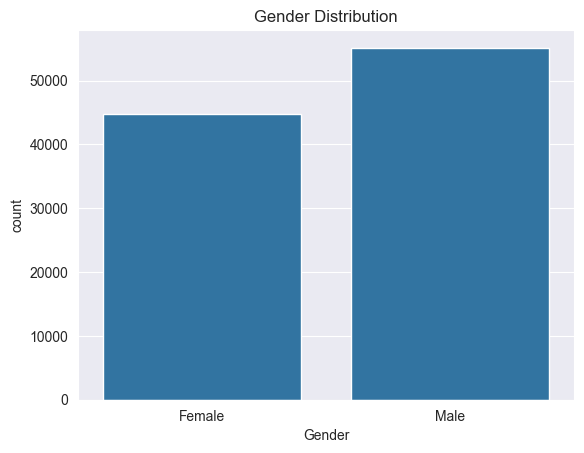

In [5]:
sns.countplot(x='Gender', data=df)
plt.title("Gender Distribution")
plt.show()

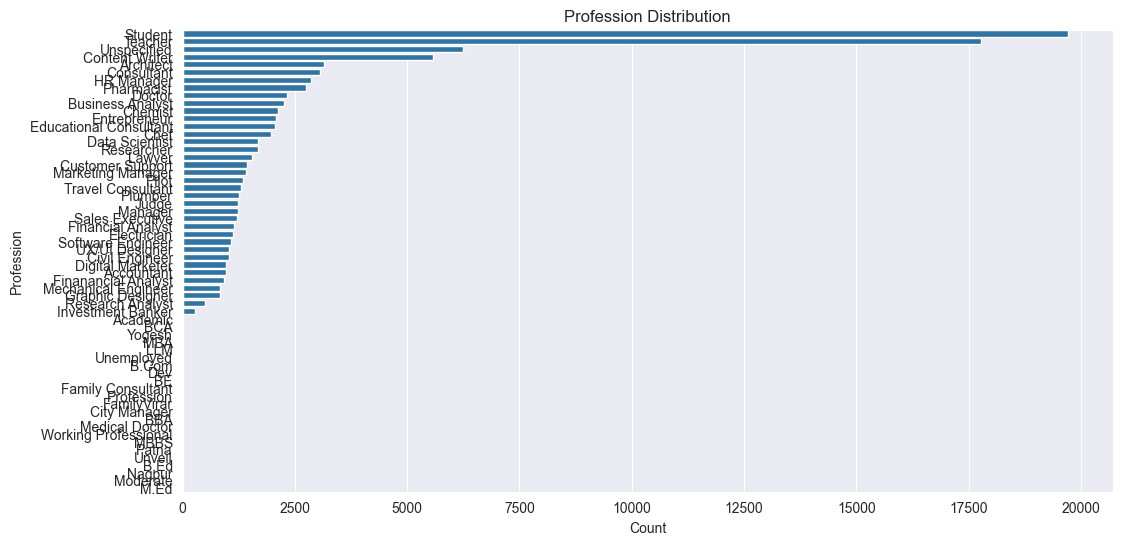

In [6]:
plt.figure(figsize=(12, 6))
sns.countplot(y='Profession', data=df, order=df['Profession'].value_counts().index)
plt.title('Profession Distribution')
plt.xlabel('Count')
plt.ylabel('Profession')
plt.show()


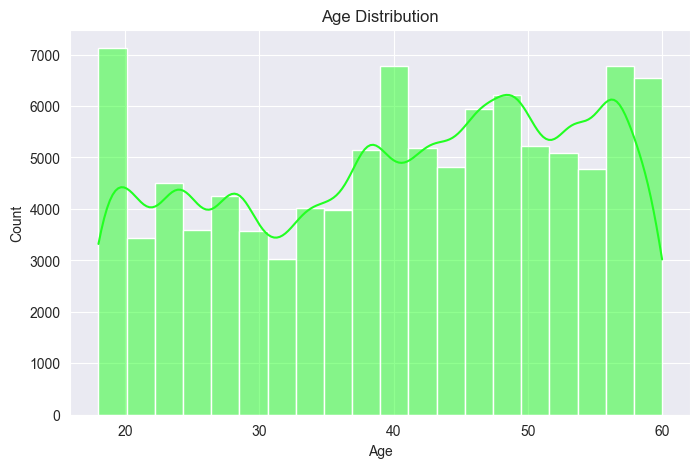

In [7]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=20, kde=True, color='#22ff22')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

<Figure size 1000x600 with 0 Axes>

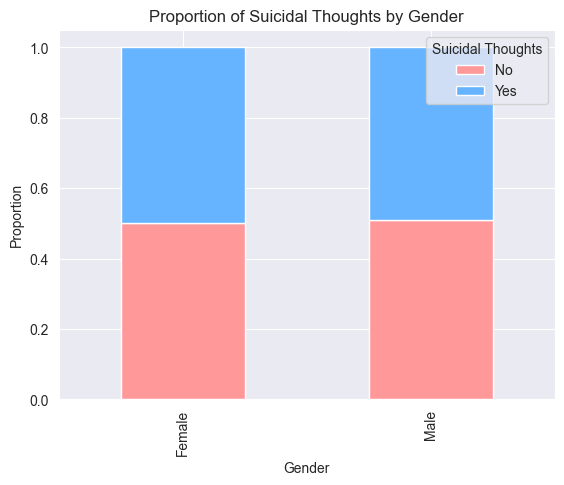

In [8]:
plt.figure(figsize=(10, 6))
cross_tab = pd.crosstab(df['Gender'], df['Have you ever had suicidal thoughts ?'], normalize='index')
cross_tab.plot(kind='bar', stacked=True, color=['#ff9999','#66b3ff'])
plt.title("Proportion of Suicidal Thoughts by Gender")
plt.ylabel("Proportion")
plt.xlabel("Gender")
plt.legend(title="Suicidal Thoughts", loc='upper right')
plt.show()


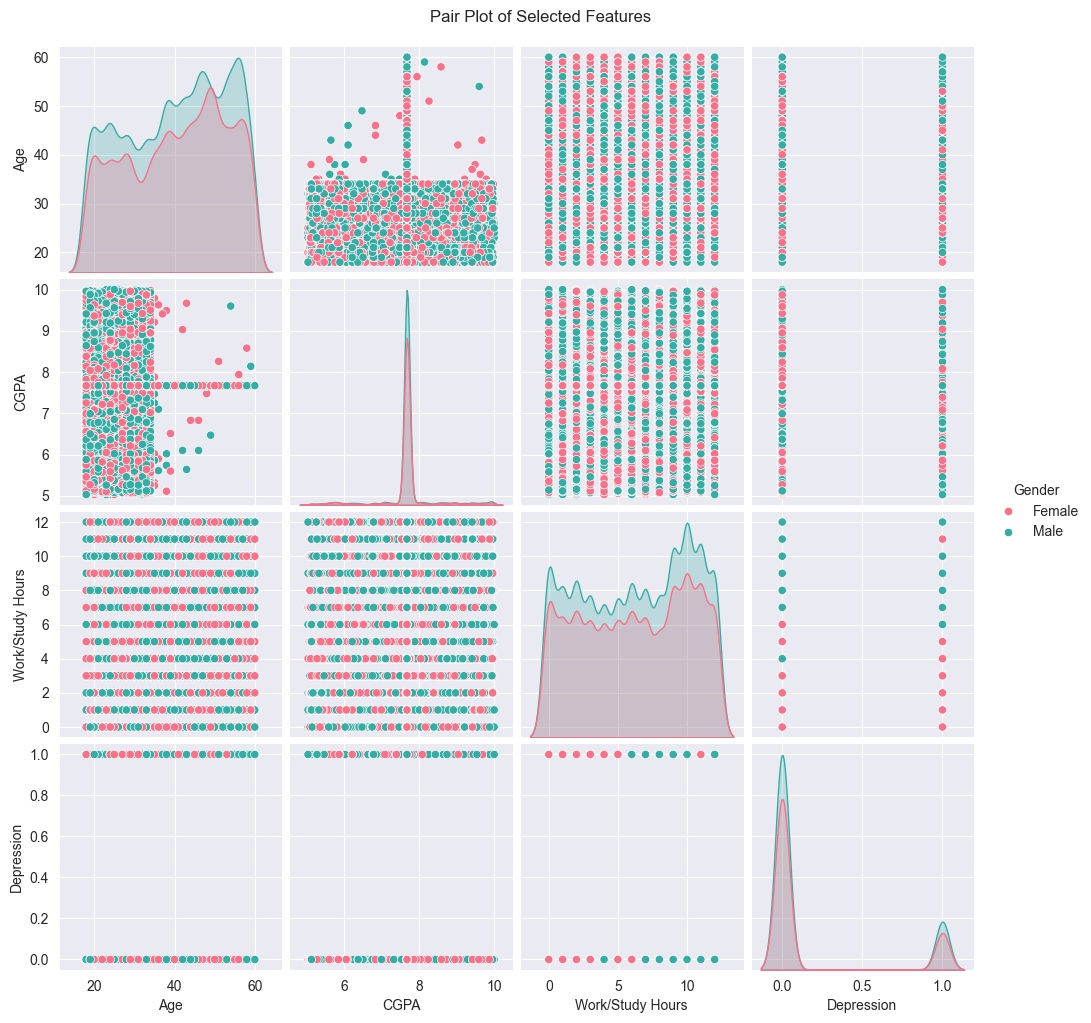

In [9]:
sns.pairplot(df, vars=['Age', 'CGPA', 'Work/Study Hours', 'Depression'], hue='Gender', palette='husl')
plt.suptitle("Pair Plot of Selected Features", y=1.02)
plt.show()

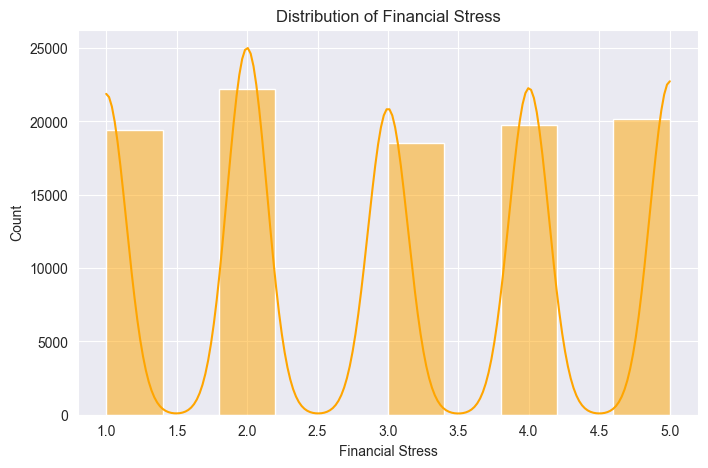

In [10]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Financial Stress'], kde=True, bins=10, color='orange')
plt.title('Distribution of Financial Stress')
plt.xlabel('Financial Stress')
plt.ylabel('Count')
plt.show()

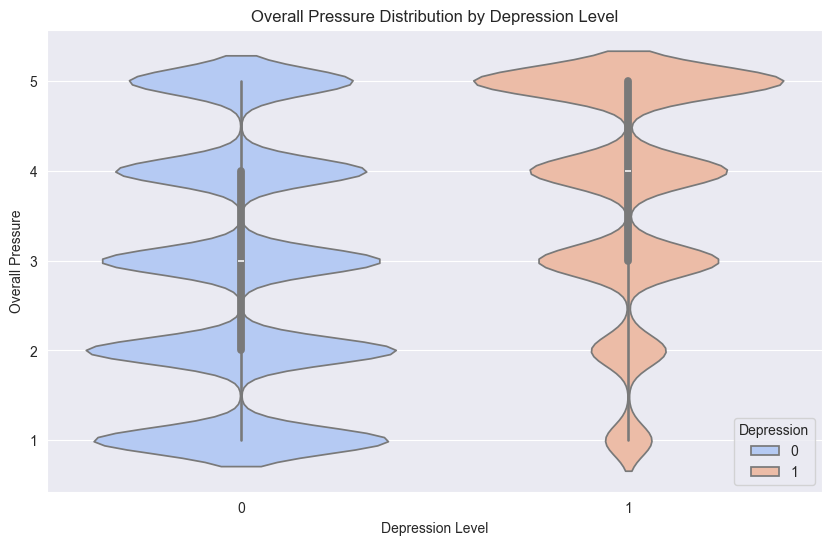

In [11]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Depression', y='Overall Pressure', palette='coolwarm',hue='Depression')
plt.title("Overall Pressure Distribution by Depression Level")
plt.xlabel("Depression Level")
plt.ylabel("Overall Pressure")
plt.show()


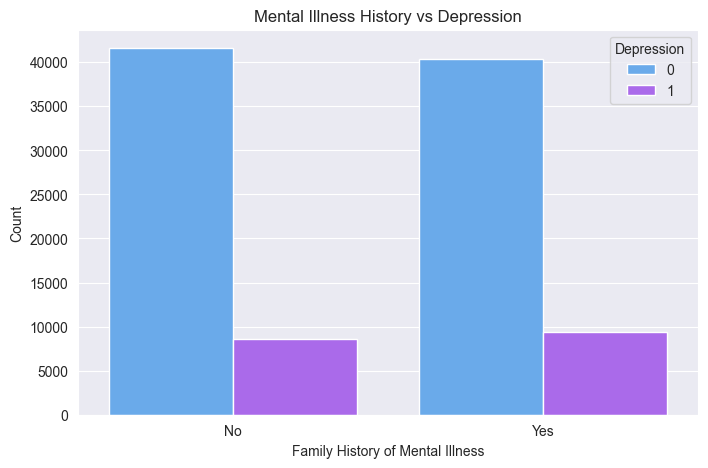

In [12]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Family History of Mental Illness', hue='Depression', data=df, palette='cool')
plt.title('Mental Illness History vs Depression')
plt.xlabel('Family History of Mental Illness')
plt.ylabel('Count')
plt.legend(title='Depression')
plt.show()

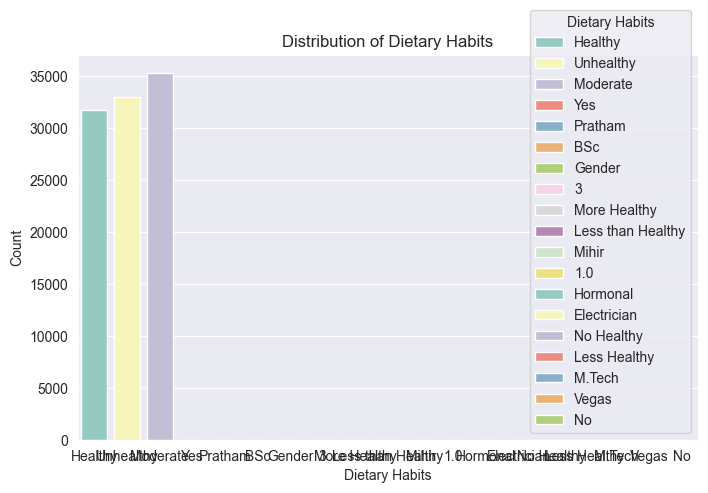

In [13]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Dietary Habits', data=df, palette='Set3',hue="Dietary Habits")
plt.title('Distribution of Dietary Habits')
plt.xlabel('Dietary Habits')
plt.ylabel('Count')
plt.show()

In [14]:
df['Have you ever had suicidal thoughts ?'] = df['Have you ever had suicidal thoughts ?'].map({'No': 0, 'Yes': 1})
df['Family History of Mental Illness'] = df['Family History of Mental Illness'].map({'No': 0, 'Yes': 1})
df['Gender'] = df['Gender'].map({'Male':0, 'Female':1})
profession_mapping = {
    'Student': 0, 'Unspecified': 1, 'Teacher': 2, 'Business Analyst': 3, 
    'Chef': 4, 'Engineer': 5, 'Doctor': 6, 'Researcher': 7, 'Other': 8
}
df['Profession'] = df['Profession'].map(profession_mapping).fillna(1)  
sleep_mapping = {
    'Less than 5 hours': 0, '5-6 hours': 1, '7-8 hours': 2, 'More than 8 hours': 3
}
df['Sleep Duration'] = df['Sleep Duration'].map(sleep_mapping)
dietary_mapping = {
    'Healthy': 0, 'Unhealthy': 1, 'Moderate': 2
}
df['Dietary Habits'] = df['Dietary Habits'].map(dietary_mapping)
categorical_columns = ['Degree']
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
df=df.dropna(how='any')

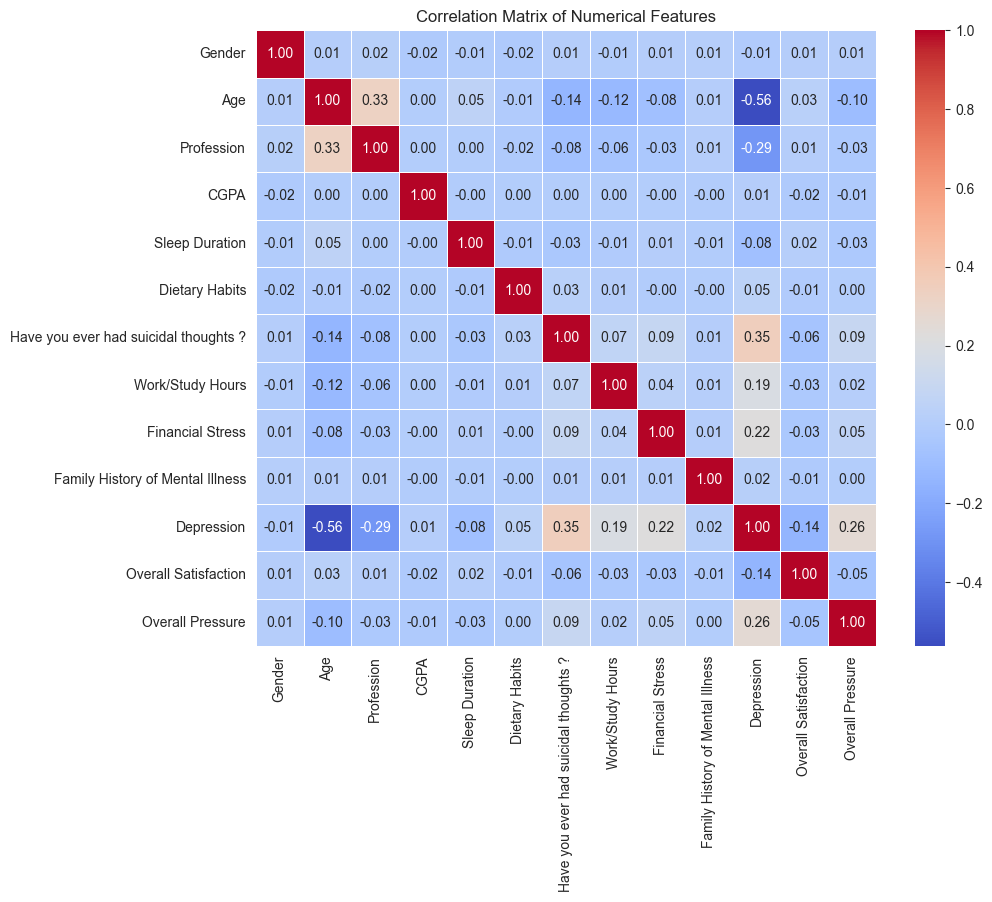

In [15]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [16]:
X = df.drop(columns=['Depression']) 
y = df['Depression']


In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
models = {
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'Support Vector Machine': SVC(kernel='rbf', random_state=42),
    'Naive Bayes': GaussianNB(),
    'LDA': LinearDiscriminantAnalysis(),
    'QDA': QuadraticDiscriminantAnalysis(),
    'Bagging': BaggingClassifier(random_state=42)
}
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, Y_train)
    Y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(Y_test, Y_pred)
    results[name] = acc
    print(f'{name}: Accuracy = {acc:.4f}')
    print(classification_report(Y_test, Y_pred))

K-Nearest Neighbors: Accuracy = 0.9171
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     16376
           1       0.81      0.71      0.76      3603

    accuracy                           0.92     19979
   macro avg       0.87      0.84      0.85     19979
weighted avg       0.91      0.92      0.92     19979

Decision Tree: Accuracy = 0.9032
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     16376
           1       0.73      0.73      0.73      3603

    accuracy                           0.90     19979
   macro avg       0.84      0.84      0.84     19979
weighted avg       0.90      0.90      0.90     19979

Random Forest: Accuracy = 0.9357
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     16376
           1       0.85      0.78      0.81      3603

    accuracy                           0.94     19979
   macro avg       0.90

In [20]:
print("\nModel Evaluation Results:")
for model_name, accuracy in results.items():
    print(f"{model_name}: Accuracy = {accuracy:.4f}")


Model Evaluation Results:
K-Nearest Neighbors: Accuracy = 0.9171
Decision Tree: Accuracy = 0.9032
Random Forest: Accuracy = 0.9357
Gradient Boosting: Accuracy = 0.9373
AdaBoost: Accuracy = 0.9357
XGBoost: Accuracy = 0.9375
Support Vector Machine: Accuracy = 0.9351
Naive Bayes: Accuracy = 0.1805
LDA: Accuracy = 0.9278
QDA: Accuracy = 0.1805
Bagging: Accuracy = 0.9269
